# Marc, this is a python notebook with some of the data exploration; skip the following several lines until the next heading

In [1]:
import ATS_Analysis as ats
import pandas as pd
import numpy as np
import seaborn as sb

%matplotlib inline

In [7]:
patient_list = ['P100', 'P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108', 'P109', 'P110',
                'P112', 'P113', 'P114', 'P115', 'P116', 'P117','P118', 'P119', 'P120',
                'P121', 'P122', 'P124', 'P125', 'P127', 'P128', 'P129', 'P130' ]
df = ats.get_data(patient_list, [120])

P100 30 16 4
P101 116 37 26
P102 49 1 0
P103 28 16 14
P104 104 0 0
P105 113 46 12
P106 30 15 15
P107 4 1 1
P108 27 1 1
P109 33 6 6
P110 94 33 28
P112 23 7 7
P113 88 35 29
P114 51 13 13
P115 77 10 10
P116 8 5 5
P117 56 41 41
P118 43 13 9
P119 180 44 42
P120 17 14 14
P121 61 13 13
P122 129 59 56
P124 108 21 21
P125 142 70 43
P127 76 2 2
P128 2 1 1
P129 88 78 76
P130 11 3 3


In [8]:
df.win.value_counts()

120    492
Name: win, dtype: int64

In [9]:
df = df[df.RASS <=0]

In [10]:
grouped = df.groupby(['win'])
test = grouped.get_group(120)
test.head()
test.to_csv(u'c:\\Research_data\\RawData\\analysis.csv')

In [4]:
test = pd.read_csv(u'c:\\Research_data\\analysis.csv')
test.columns

Index(['entry_time', 'RASS', 'SpO2', 'analysis.pds', 'ds_freq', 'ds_rolling',
       'ds_tot_rolling', 'fio2_rolling', 'ie_freq', 'ie_rolling',
       'ie_tot_rolling', 'p_mean_rolling', 'paCO2', 'paO2', 'patientID',
       'peep_rolling', 'ph', 'pl_freq', 'pl_rolling', 'pl_tot_rolling', 'plat',
       'vent_settings.FiO2', 'vent_settings.PEEP', 'vent_settings.p_mean',
       'win'],
      dtype='object')

In [5]:
sb.set_style('whitegrid')

# Ok, now this is where the data exploration starts
## Below are multiple scatter plots showing the bivariate relation of several things with an overlying linear regression line, data has been windowed for a 120min period around each RASS score
#### -- ds_freq = frequency of double stacked breaths; for each type this is the number of dyssynchronous breaths over total breaths in a 120min period surround each RASS score
#### -- ie_freq = frequency of ineffective triggers;
#### -- pl_freq = frequency of flow limited breaths with dips in the pressure curve;
#### -- RASS = RASS (these seemed to recored q4h);
#### -- peep_rolling = average peep over 120min period;
#### -- fio2_rolling = average fio2 over 120min period;
#### -- p_mean_rolling = average mean airway pressure over 120min period;
#### -- plat = plateau pressures as measured by RN, there are far fewer of these measurements;
#### -- ph = pH for ABG, there are far fewer of these measurements

## Conclusions
#### -- ds, ie, and flow limited breaths generally decrease with more negative RASS scores (-6 is NMB)
#### -- fio2, peep, mean air way pressure don't have an obvious correlation with ds, pl
#### -- fio2, peep, mean air way pressure may be inversely realted to ie, with less ie at higher fio2, peep, mean - this seems very wierd and is the opposite of what i would expect
#### -- plat and ds, pl, ie may also be inversely related, again, this seems wierd
#### -- i don't think there are enough ph data points to say anything meaningful
#### -- as might be expected, more negative rass correlates with higher peep, plat, mean airway pressure, and fio2

C:\Users\sottilep\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


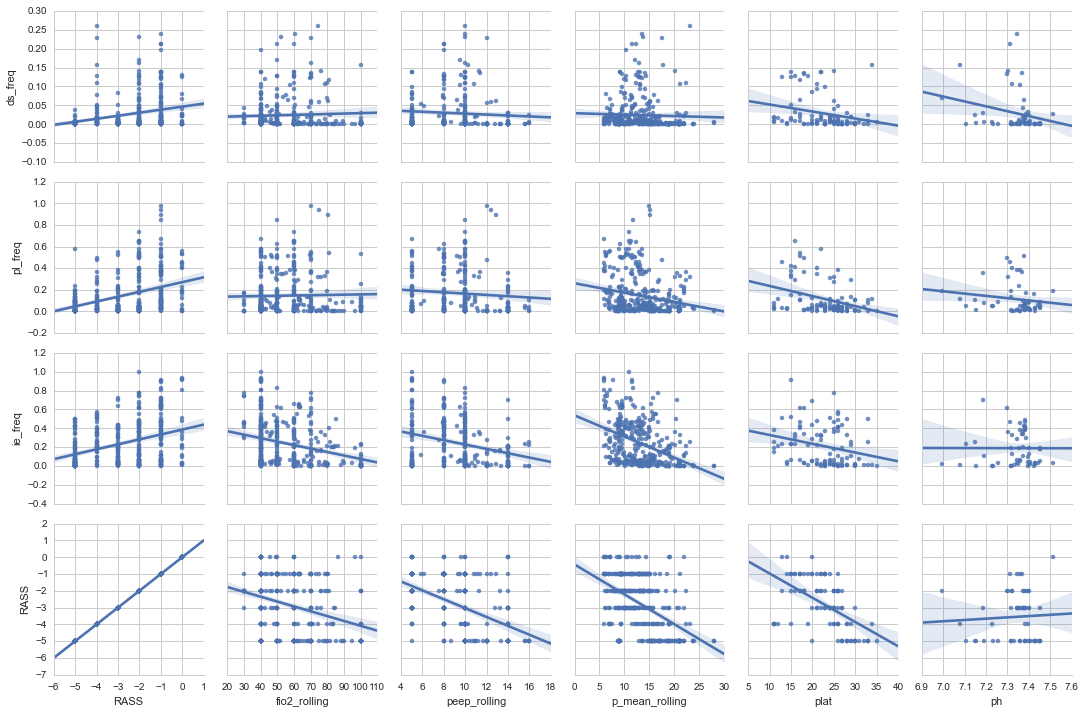

In [6]:
sb.pairplot(test, y_vars=['ds_freq', 'pl_freq', 'ie_freq', 'RASS'], 
            x_vars=['RASS', 'fio2_rolling', 'peep_rolling', 'p_mean_rolling', 'plat', 'ph', 'ds_freq', 'pl_freq', 'ie_'],
            kind='reg')

## I then wanted to look more closely at the each type of dyssynchrony vs RASS score
### below is RASS vs ds breaths

C:\Users\sottilep\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


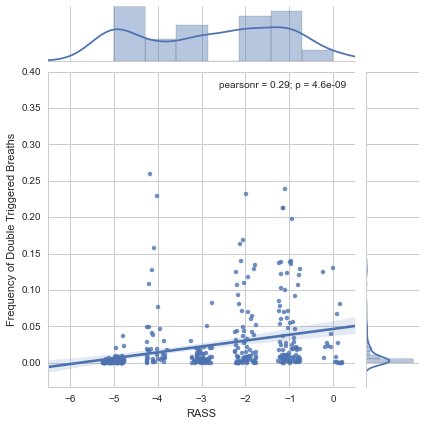

In [32]:
sb.jointplot('RASS', 'ds_freq', data=test,  x_jitter=0.25, kind='reg', xlim=(-6.5, 0.5),  ylim=(-0.033,0.4)).set_axis_labels('RASS', 'Frequency of Double Triggered Breaths')

### below is then the histograms for the distribution of dyssynchrony frequency around each rass score

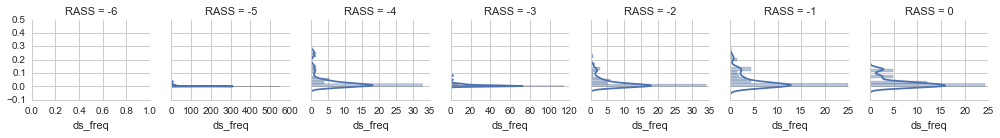

In [15]:
g = sb.FacetGrid(test, col='RASS', sharex=False, col_order=[-6, -5, -4, -3, -2, -1, 0], size=2, sharey=True, ylim=(-0.1,0.5))
g.map(sb.distplot, 'ds_freq', vertical=True)

## for flow limited breaths

C:\Users\sottilep\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


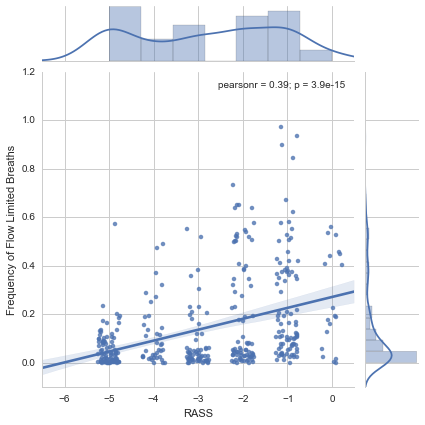

In [16]:
sb.jointplot('RASS', 'pl_freq', data=test,  x_jitter=0.25, kind='reg', xlim=(-6.5, 0.5), ylim=(-0.1,1.2)).set_axis_labels('RASS', 'Frequency of Flow Limited Breaths')

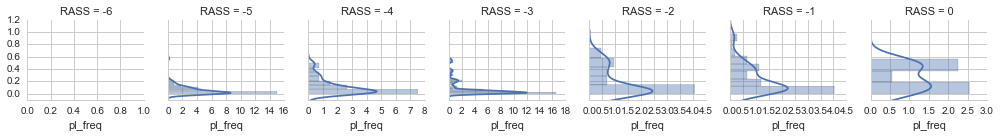

In [17]:
g = sb.FacetGrid(test, col='RASS', sharex=False, col_order=[-6, -5, -4, -3, -2, -1, 0], size=2, sharey=True, ylim=(-0.1,1.2))
g.map(sb.distplot, 'pl_freq', vertical=True)


## for ineffective triggers

C:\Users\sottilep\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


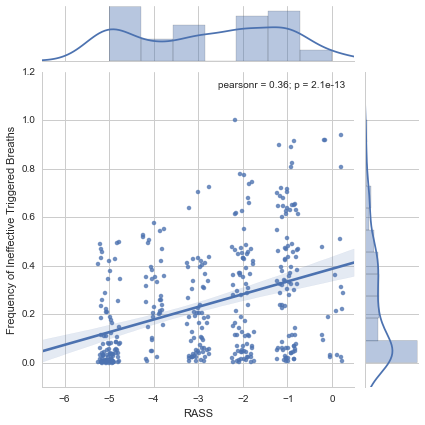

In [18]:
sb.jointplot('RASS', 'ie_freq', x_jitter=0.25, data=test, kind='reg', xlim=(-6.5, 0.5), ylim=(-0.1,1.2)).set_axis_labels('RASS', 'Frequency of Ineffective Triggered Breaths')

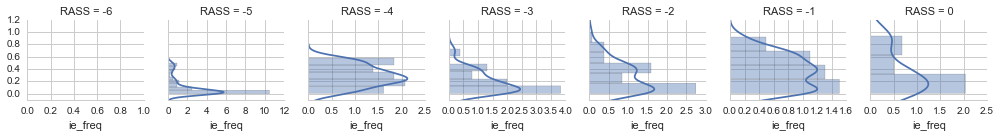

In [19]:
g = sb.FacetGrid(test, col='RASS', sharex=False, col_order=[-6, -5, -4, -3, -2, -1, 0], size=2, sharey=True, ylim=(-0.1,1.2))
g.map(sb.distplot, 'ie_freq', vertical=True)

## Showing the same data another way:
### -- boxplots showing the distributions of dyssynchrony around each RASS measurement
## Conclusions:
#### -- RASS of 4 has a wierd outlier for all types of dyssnchrony with an uptick in freuquency
#### -- generally ds and fl breaths seem to be decreased below a RASS of 3;
### For DS breaths using JMP and paired wilcoxon tests
#### -- RASS -6, -5, -3 are all signficantly lower than 0, -1, -2; all p<0.02
#### -- RASS -4 is a has a couple of outliers that scews things


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CF4AC18>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D1524E0>], dtype=object)

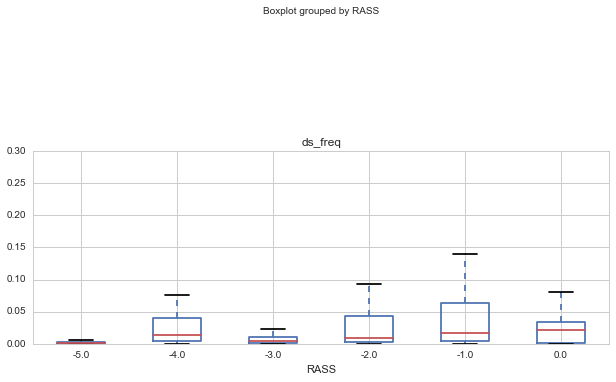

In [20]:
test.boxplot(column='ds_freq', by='RASS', layout=(6,1), figsize=(10,25))

## Conclusion for Pl breaths
#### -- same general conclusions, generally decreased with RASS -3 and lower
#### --  RASS -6, -5, -3 are all signficantly lower than 0, -1, -2; all p<0.005
#### -- RASS -4 is a has a couple of outliers that scews things

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7E0588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D3F1710>], dtype=object)

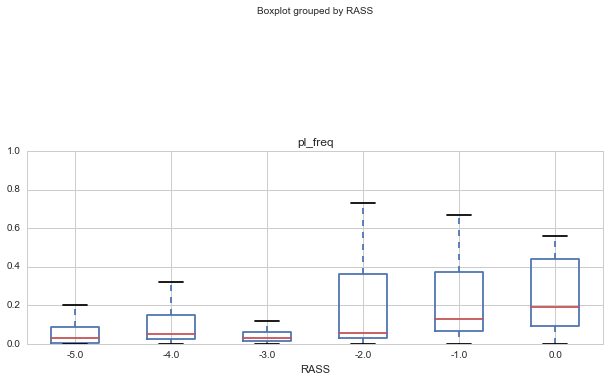

In [21]:
test.boxplot(column='pl_freq', by='RASS', layout=(6,1), figsize=(10,25))

# Conclusion for IE breaths
#### -- same general conclusions, generally decreased with RASS -5 and lower
#### --  RASS -6, -5, are all signficantly lower than 0, -1, -2, -3, -4; all p<0.005

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D4DA588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D6249E8>], dtype=object)

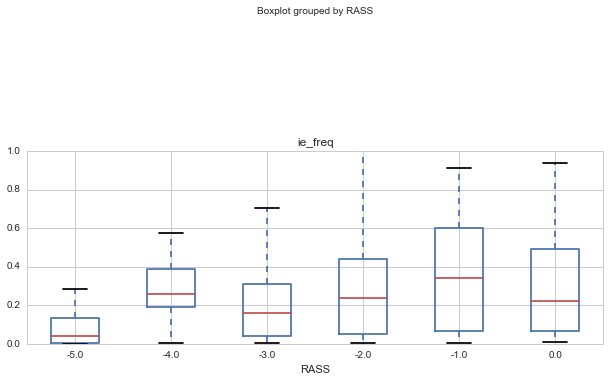

In [22]:
test.boxplot(column='ie_freq', by='RASS', layout=(6,1), figsize=(10,25))

## Given this seeming cut off with a RASS of -3, I dicotomized RASS to <= -3 or >-3

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D70ECC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D7A05F8>], dtype=object),)

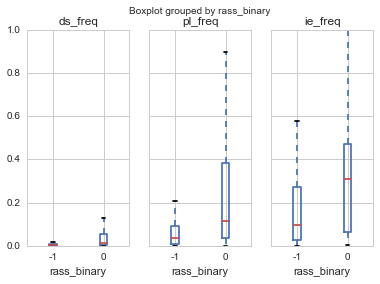

In [23]:
test['rass_binary'] = test.RASS.apply(lambda x: -1 if x <= -3 else 0)

test.boxplot(column=['ds_freq', 'pl_freq', 'ie_freq'], by='rass_binary', layout=(1,3)),

## Next, instead of looking at the freuency off dyssynchrony for each RASS, so that we could see distributions as above, i simple summed the total number of dyssynchonies for each RASS over total breas for each each RASS (ie, grouped all RASS -3 breaths together, summed and divided by total)

#### -- the regression line for pl breaths is shockingly linear
#### -- i am supprised by how poorly ds breaths are fit given the trend looked better above
#### -- conversely, i am supporsed by how much cleaner the ie trend is this way given the way it looked above

C:\Users\sottilep\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


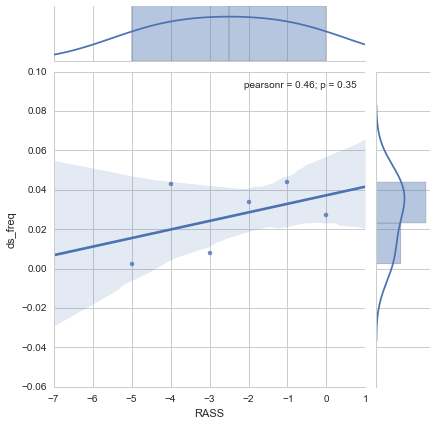

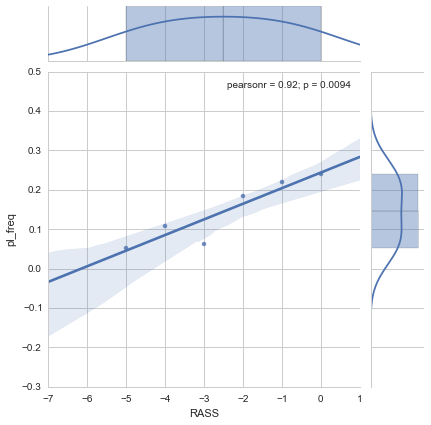

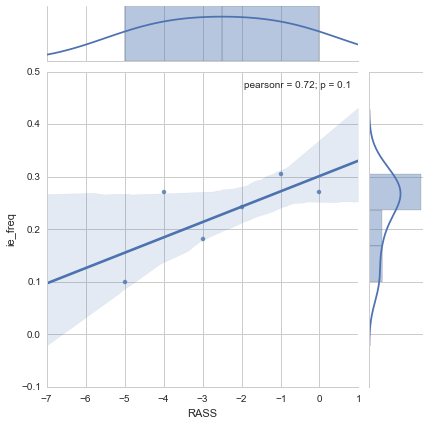

In [24]:
grouped = test.groupby('RASS').sum()
grouped['ds_freq'] = grouped['ds_rolling'] / grouped['ds_tot_rolling']
grouped['pl_freq'] = grouped['pl_rolling'] / grouped['pl_tot_rolling']
grouped['ie_freq'] = grouped['ie_rolling'] / grouped['ie_tot_rolling']
grouped.reset_index(inplace=True)

sb.jointplot('RASS','ds_freq', data=grouped, kind='reg', xlim=(-7,1))
sb.jointplot('RASS','pl_freq', data=grouped, kind='reg', xlim=(-7,1))
sb.jointplot('RASS','ie_freq', data=grouped, kind='reg', xlim=(-7,1))

In [25]:
grouped

,RASS,SpO2,analysis.pds,ds_freq,ds_rolling,ds_tot_rolling,fio2_rolling,ie_freq,ie_rolling,ie_tot_rolling,p_mean_rolling,paCO2,paO2,patientID,peep_rolling,ph,pl_freq,pl_rolling,pl_tot_rolling,plat,vent_settings.FiO2,vent_settings.PEEP,vent_settings.p_mean,win,rass_binary
0,-5,7674,NaN,0.002396,628.5,262355,6274.453879,0.099815,26187.0,262355,1612.575185,907,2578,10522,905.033559,183.635,0.052328,13728.500000,262355,586,2650,357,674,11400,-95
1,-4,3306,1,0.042917,4343.5,101207,2268.224795,0.269878,27313.5,101207,534.267334,175,361,4580,314.506185,29.080,0.109054,11037.000000,101207,361,1170,170,287,4560,-38
2,-3,4999,NaN,0.008107,1330.5,164127,2983.584713,0.180683,29655.0,164127,768.881658,581,1367,7072,341.004479,117.767,0.063375,10401.500000,164127,411,980,129,252,7560,-63
3,-2,6234,NaN,0.033873,6639.0,195995,3985.555021,0.242948,47616.5,195995,931.001539,354,815,7947,414.941238,73.175,0.184047,36072.333333,195995,493,1530,161,352,9480,0
4,-1,7171,NaN,0.043744,9189.0,210062,4433.621595,0.305786,64234.0,210062,988.011683,162,511,9473,562.553742,29.385,0.218962,45995.500000,210062,426,1410,189,307,10560,0
5,0,1525,NaN,0.027180,1042.5,38355,1007.966714,0.270212,10364.0,38355,203.638929,36,67,2154,125.569853,7.513,0.239943,9203.000000,38355,47,470,56,92,2280,0


## Finally, I dropped my data into jump and did some linear regression to see with RASS as the predictor variable, ds, pl, or ie as the outcome; and fio2, peep, and mean airway pressure as covariates; I wanted to include plat pressures as well, but it dropped my n to form the mid 300s to the 70s; so I dropped it

#### -- DS - RASS was the only signficnt predictors, covariates fell out (p<0.0001)
#### -- PL - RASS indepedently associated (p<0.0001), everything else was also signficant as well
#### -- IE - RASS independently associated (p<0.0001), as well as mean airway pressure and peep
#### -- mean airway pressure correlated such that increased pressure was associated with less dyssynchrony when signficant (wierd); higher peeps correlated with more dyssynchrony (PL and IE)

## As a sensitivity check, below shows how the median frequency of dyssynchrony is not really changed all that much (at least to an eye ball test) by changing the window measured around each RASS score
### -- 10 60, 120, and 240min intervals were tested
### -- I am somewhat suprised by this

In [26]:
#grouped = df.groupby(['win', 'RASS'])
#freq = grouped[['ds_rolling', 'pl_rolling', 'ie_rolling', 'ds_tot_rolling']].sum()
#freq.to_csv(u'c:\\Research_data\\RawData\\freq_analysis.csv')

In [27]:
#grouped[['ds_freq', 'pl_freq', 'ie_freq']].median().unstack(level=0)

In [28]:
#grouped[['ds_rolling', 'pl_rolling', 'ie_rolling', 'ds_tot_rolling']].sum().unstack(level=0)